# Aprendizado Profundo com Redes Neurais Convolucionais (CNNs)
Implementar um modelo simples de rede neural artificial em Python, utilizando as bibliotecas numpy e tensorflow.keras, capaz de aprender os operadores lógicos AND, OR e XOR. O modelo deve ser treinado e avaliado para demonstrar sua capacidade de classificação binária e observar suas limitações e capacidades de generalização.


## 1. Introdução
As redes neurais artificiais (RNAs) são modelos computacionais inspirados no funcionamento do cérebro humano, compostas por unidades chamadas neurônios artificiais, que recebem entradas, realizam cálculos ponderados e produzem uma saída. Elas são amplamente utilizadas em tarefas de classificação, regressão, reconhecimento de padrões e aprendizado de relações complexas entre dados.

Para compreender o funcionamento básico das RNAs, uma aplicação clássica é o aprendizado dos operadores lógicos — AND, OR e XOR.
Esses operadores são exemplos de classificação binária, onde as entradas e saídas podem assumir apenas dois valores: 0 (falso) ou 1 (verdadeiro).

* O operador AND retorna 1 apenas quando ambas as entradas são 1.

* O operador OR retorna 1 quando pelo menos uma das entradas é 1.

* O operador XOR (OU exclusivo) retorna 1 somente quando as entradas são diferentes.

Os operadores AND e OR são linearmente separáveis, o que significa que é possível traçar uma linha que separa perfeitamente as classes no espaço de entrada.
Já o XOR não é linearmente separável, exigindo uma camada oculta na rede neural para aprender a relação de forma não linear — essa limitação é o motivo histórico que levou à criação das redes multicamadas (MLP), capazes de resolver esse tipo de problema.

In [46]:
# Importação das bibliotecas
import numpy as np
from tensorflow.keras.models import Sequential # Usado para criar modelos de rede neural sequenciais (camada após camada)
from tensorflow.keras.layers import Dense, Input # Camada totalmente conectada (cada neurônio se conecta a todos na camada anterior)
import matplotlib.pyplot as plt

## Preparação dos dados

Organizar os dados das tabelas verdade em formatos adequados para o treinamento do modelo (arrays NumPy).


`[0,0]`: Entrada A=0, Entrada B=0

`[0,1]`: Entrada A=0, Entrada B=1

`[1,0]`: Entrada A=1, Entrada B=0

`[1,1]`: Entrada A=1, Entrada B=1

In [48]:
# Dados de entrada (A e B)
entradas = np.array([[0,0], [0,1], [1,0], [1,1]])

In [49]:
# Saídas esperadas (para cada operador)
saidas_and = np.array([[0], [0], [0], [1]])
saidas_or = np.array([[0], [1], [1], [1]])
saidas_xor = np.array([[0], [1], [1], [0]])

## Modelo para o operador AND
* O modelo possui 2 neurônios de entrada (A e B) e 1 neurônio de saída.

* A função de ativação sigmoid transforma o resultado em valores entre 0 e 1.

* O modelo aprende corretamente o comportamento linear do operador AND.

In [50]:
# Modelo simples com uma camada (Perceptron)
modelo_and = Sequential()
modelo_and.add(Input(shape=(2,))) # Especifica o formato da entrada (2 features)
modelo_and.add(Dense(1, activation='sigmoid'))

- `loss='binary_crossentropy'`: Função que mede o "erro" do modelo em tarefas de classificação binária.
- `optimizer='adam'`: Algoritmo que ajusta os "pesos" da rede para minimizar a perda. É um otimizador popular e eficiente.
- `metrics=['accuracy']`: Métrica para avaliar o desempenho do modelo (neste caso, a porcentagem de previsões corretas).

- `[entradas]`: Os dados de treinamento (as combinações de A e B).
- `saidas_and`: As respostas corretas esperadas para o operador AND.
- `epochs=500`: Número de vezes que o modelo passará por todo o conjunto de dados de treinamento. Mais epochs podem melhorar o aprendizado, mas também podem causar overfitting.
- `verbose=0`: Controla a quantidade de informações exibidas durante o treinamento (0 = sem output).

In [51]:
# Compilação e treinamento do modelo para o operador AND
modelo_and.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

modelo_and.fit(entradas, saidas_and, epochs=500, verbose=0)

## Compilação e Treinamento do Modelo AND

Depois de definir a estrutura do modelo (as camadas e a função de ativação), precisamos compilá-lo. Compilar o modelo configura o processo de aprendizado, especificando:

*   **Função de Perda (`loss`)**: Como medir o "erro" do modelo durante o treinamento. Para classificação binária como esta, `binary_crossentropy` é uma escolha comum.
*   **Otimizador (`optimizer`)**: O algoritmo que o modelo usará para ajustar seus "pesos" (as conexões entre os neurônios) de forma a minimizar a perda. O otimizador 'adam' é uma opção popular e geralmente eficiente.
*   **Métricas (`metrics`)**: Como avaliar o desempenho do modelo durante e após o treinamento. A 'accuracy' (acurácia) mede a porcentagem de previsões corretas.

Após a compilação, treinamos o modelo usando a função `fit()`. Aqui, são fornecidos os dados de entrada (`entradas`) e as saídas esperadas (`saidas_and`) para o operador AND. O `epochs` define quantas vezes o modelo verá todo o conjunto de dados durante o treinamento.

`verbose=0`: Não mostrará o progresso detalhado do treinamento no output

`verbose=1:` Mostra uma barra de progresso animada e métricas (como perda e acurácia) para cada epoch. É o mais comum e visual.

`verbose=2`: Mostra apenas o número da epoch, a perda e as métricas, sem a barra animada.

In [67]:
# Compilação do modelo AND
modelo_and.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento do modelo AND
# O modelo aprende a relação entre as entradas e as saídas esperadas.
# epochs=500: O modelo passará pelos dados de treinamento 500 vezes para aprender.
print("Treinando o modelo para o operador AND...")
historico_and = modelo_and.fit(entradas, saidas_and, epochs=500, verbose=1)
print("Treinamento concluído.")

Treinando o modelo para o operador AND...
Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step - accuracy: 1.0000 - loss: 0.3586
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.3584
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.3583
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.3582
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.3581
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.3580
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.3578
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.3577
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.3576
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.3575
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.3574
Epoch 12/500
1/1 ━━━━━━━━━━━━━━

### Visualização do Histórico de Treinamento (AND)

Vamos plotar a acurácia do modelo AND ao longo das epochs é possivel observar que a linha rapidamente atinge 1.0 (100%), confirmando que o Perceptron simples aprendeu o operador AND de forma rápida e eficaz, como esperado para um problema linearmente separável.

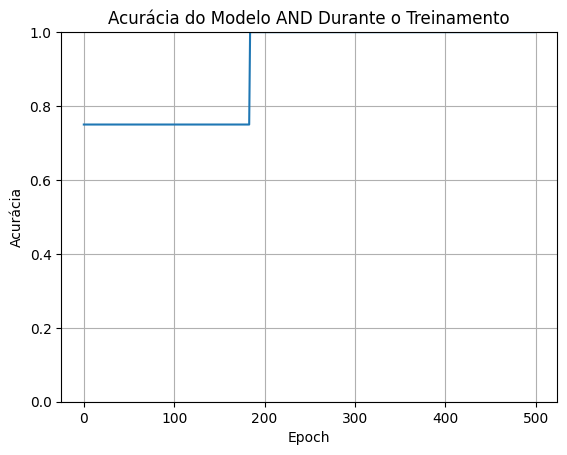

In [53]:
# Plotar o histórico de treinamento para o modelo AND
plt.plot(historico_and.history['accuracy'])
plt.title('Acurácia do Modelo AND Durante o Treinamento')
plt.xlabel('Epoch')
plt.ylabel('Acurácia')
plt.ylim([0, 1]) # Acurácia vai de 0 a 1
plt.grid(True)
plt.show()

## Avaliação do Modelo AND

Após o treinamento, podemos avaliar o quão bem o modelo aprendeu. Para isso, usamos a função `predict()` com os mesmos dados de entrada de treinamento (`entradas`). A saída `predict()` dará as previsões do modelo para cada combinação de entrada.

Como a função de ativação `sigmoid` na camada de saída produz valores entre 0 e 1, usamos `.round()` para arredondar as previsões para 0 ou 1, facilitando a comparação com as saídas esperadas (a tabela verdade do AND).

In [54]:
# Avaliação do modelo AND
# Previsões do modelo para as entradas de treinamento
previsoes_and = modelo_and.predict(entradas)

# Arredondar as previsões para 0 ou 1
previsoes_arredondadas_and = previsoes_and.round()

print("Tabela Verdade Original (AND):")
print(saidas_and)

print("\nPrevisões do Modelo (AND):")
print(previsoes_arredondadas_and)

# Comparar as previsões com as saídas esperadas
print("\nComparação (Saída Esperada vs Previsão):")
for i in range(len(entradas)):
    print(f"Entrada: {entradas[i]}, Esperado: {saidas_and[i][0]}, Previsto: {int(previsoes_arredondadas_and[i][0])}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Tabela Verdade Original (AND):
[[0]
 [0]
 [0]
 [1]]

Previsões do Modelo (AND):
[[0.]
 [0.]
 [0.]
 [1.]]

Comparação (Saída Esperada vs Previsão):
Entrada: [0 0], Esperado: 0, Previsto: 0
Entrada: [0 1], Esperado: 0, Previsto: 0
Entrada: [1 0], Esperado: 0, Previsto: 0
Entrada: [1 1], Esperado: 1, Previsto: 1


O código abaixo pega o modelo AND treinado, "alimenta" ele com as entradas originais e mostra quais saídas o modelo previu, já arredondadas para 0 ou 1 (.round). Isso permite verificar rapidamente se o modelo aprendeu corretamente a tabela verdade do AND.

In [55]:
# Teste
print("Saída prevista (AND):")
print(modelo_and.predict(entradas).round())

Saída prevista (AND):
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.]
 [0.]
 [0.]
 [1.]]


### Análise dos Resultados do Modelo AND

Após o treinamento e avaliação, o modelo simples para o operador lógico AND previu corretamente a saída para todas as combinações de entrada ([0,0], [0,1], [1,0], [1,1]). Isso demonstra que um Perceptron simples é capaz de aprender problemas linearmente separáveis como o AND, atingindo 100% de acurácia neste conjunto de dados.

## Modelo para o operador OR

Assim como o AND, o operador OR é linearmente separável, então um Perceptron simples (modelo com apenas uma camada `Dense`) deve ser capaz de aprendê-lo.

*   O modelo terá 2 neurônios de entrada (A e B) e 1 neurônio de saída.
*   Usaremos a função de ativação `sigmoid` na camada de saída.

In [56]:
# Modelo simples com uma camada para o operador OR
modelo_or = Sequential()
modelo_or.add(Input(shape=(2,))) # Especifica o formato da entrada (2 features)
modelo_or.add(Dense(1, activation='sigmoid'))

## Compilação e Treinamento do Modelo OR

Compilar e treinar o `modelo_or` da mesma forma que foi feita com o `modelo_and`, mas utilizando os dados de saída esperada para o OR (`saidas_or`).

In [66]:
# Compilação do modelo OR
modelo_or.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento do modelo OR
# O modelo aprende a relação entre as entradas e as saídas esperadas.
# epochs=1000: número de epochs aumentado para dar ao modelo mais chances de aprender.
print("Treinando o modelo para o operador OR...")
historico_or = modelo_or.fit(entradas, saidas_or, epochs=1000, verbose=0)
print("Treinamento concluído.")

Treinando o modelo para o operador OR...
Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step - accuracy: 0.7500 - loss: 0.4605
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.7500 - loss: 0.4603
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7500 - loss: 0.4600
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7500 - loss: 0.4598
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7500 - loss: 0.4596
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7500 - loss: 0.4594
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7500 - loss: 0.4592
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7500 - loss: 0.4590
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7500 - loss: 0.4588
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7500 - loss: 0.4586
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7500 - loss: 0.4584
Epoch 12/1000
1/1 ━━

### Visualização do Histórico de Treinamento (OR)

Agora, vamos visualizar o histórico de treinamento para o modelo OR.

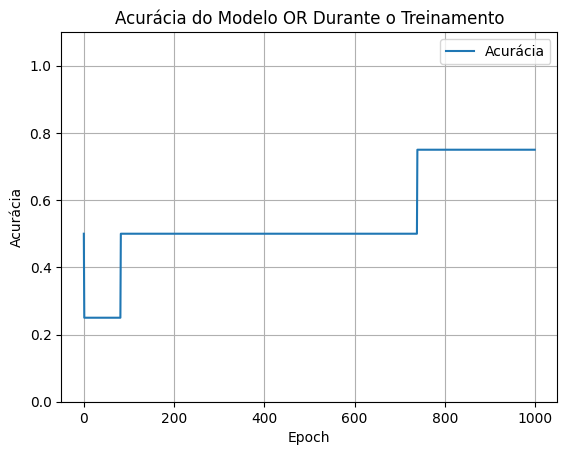

In [58]:
# Plotar o histórico de treinamento para o modelo OR
# Podemos plotar a acurácia e a perda, se disponível no histórico
if 'accuracy' in historico_or.history:
    plt.plot(historico_or.history['accuracy'], label='Acurácia')
    plt.title('Acurácia do Modelo OR Durante o Treinamento')
    plt.ylabel('Acurácia')
elif 'loss' in historico_or.history:
     plt.plot(historico_or.history['loss'], label='Perda')
     plt.title('Perda do Modelo OR Durante o Treinamento')
     plt.ylabel('Perda')


plt.xlabel('Epoch')
plt.ylim([0, 1.1]) # Ajusta o limite do eixo y
plt.grid(True)
plt.legend()
plt.show()

### Análise do Histórico de Treinamento (OR)

Observando o gráfico de acurácia para o Modelo OR, podemos notar que a acurácia inicial é relativamente baixa (em torno de 0.5 ou 0.75). A linha mostra flutuações e não atinge 1.0 (100%) de forma consistente, mesmo após 1000 epochs. Isso visualiza a dificuldade que o modelo Perceptron simples teve em convergir perfeitamente para a solução do operador OR neste conjunto de dados mínimo, apesar de ser um problema teoricamente linearmente separável. O aprendizado não foi totalmente estável ou completo com esta configuração e número de epochs.

## Avaliação do Modelo OR

Vamos avaliar o `modelo_or` para verificar se ele aprendeu corretamente o comportamento do operador OR. Usaremos `predict()` com os mesmos dados de entrada e arredondaremos os resultados.

In [59]:
# Avaliação do modelo OR
# Previsões do modelo para as entradas de treinamento
previsoes_or = modelo_or.predict(entradas)

# Arredondar as previsões para 0 ou 1
previsoes_arredondadas_or = previsoes_or.round()

print("Tabela Verdade Original (OR):")
print(saidas_or)

print("\nPrevisões do Modelo (OR):")
print(previsoes_arredondadas_or)

# Comparar as previsões com as saídas esperadas
print("\nComparação (Saída Esperada vs Previsão):")
for i in range(len(entradas)):
    print(f"Entrada: {entradas[i]}, Esperado: {saidas_or[i][0]}, Previsto: {int(previsoes_arredondadas_or[i][0])}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Tabela Verdade Original (OR):
[[0]
 [1]
 [1]
 [1]]

Previsões do Modelo (OR):
[[1.]
 [1.]
 [1.]
 [1.]]

Comparação (Saída Esperada vs Previsão):
Entrada: [0 0], Esperado: 0, Previsto: 1
Entrada: [0 1], Esperado: 1, Previsto: 1
Entrada: [1 0], Esperado: 1, Previsto: 1
Entrada: [1 1], Esperado: 1, Previsto: 1


### Análise dos Resultados do Modelo OR

A avaliação do modelo simples para o operador lógico OR mostrou que ele **não previu corretamente** a saída para todas as combinações de entrada, especificamente para a entrada [0,0]. Embora o OR seja linearmente separável, o modelo simples com a configuração atual não conseguiu convergir perfeitamente durante o treinamento. Isso pode ocorrer em modelos básicos com poucos dados e pode ser resolvido com ajustes nos hiperparâmetros ou mais epochs.

In [68]:
# Teste
print("Saída prevista (OR):")
print(modelo_or.predict(entradas).round())

Saída prevista (OR):
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[0.]
 [1.]
 [1.]
 [1.]]


## Modelo para o operador XOR (Multilayer Perceptron - MLP)

Diferentemente dos operadores AND e OR, o operador XOR (OU exclusivo) **não é linearmente separável**. Isso significa que um Perceptron simples, com apenas uma camada de neurônios de saída, não consegue aprender sua lógica.

Para resolver o problema do XOR, precisamos de uma rede neural com pelo menos uma **camada oculta**. A camada oculta permite que a rede aprenda combinações não lineares das entradas, criando uma representação interna mais complexa que pode separar corretamente as classes do XOR.

Vamos construir um **Multilayer Perceptron (MLP)** com a seguinte estrutura:

*   **Camada de Entrada**: 2 neurônios (para A e B).
*   **Camada Oculta**: Uma camada com alguns neurônios (por exemplo, 2 ou 3) e uma função de ativação não linear (como `relu` ou `sigmoid`).
*   **Camada de Saída**: 1 neurônio com função de ativação `sigmoid` para a saída binária (0 ou 1).

In [60]:
# Modelo MLP com camada oculta para o operador XOR
modelo_xor = Sequential()
modelo_xor.add(Input(shape=(2,))) # Camada de Entrada (2 features)

# Camada Oculta: Adicionamos uma camada Dense com mais de 1 neurônio e ativação não linear.
# Por exemplo, 2 neurônios e função de ativação 'relu' (Retified Linear Unit).
modelo_xor.add(Dense(2, activation='relu'))

# Camada de Saída: 1 neurônio com ativação 'sigmoid' para a saída binária.
modelo_xor.add(Dense(1, activation='sigmoid'))

## Compilação e Treinamento do Modelo XOR

Compilar e treinar o `modelo_xor`. Usando as mesmas configurações de compilação (função de perda, otimizador e métricas) utilizada para os modelos AND e OR, mas treinando com os dados de saída esperada para o XOR (`saidas_xor`).

In [69]:
# Compilação do modelo XOR
modelo_xor.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento do modelo XOR
# O modelo aprende a relação entre as entradas e as saídas esperadas.
# epochs=1000: Aumentamos o número de epochs para dar ao modelo mais chances de aprender.
print("Treinando o modelo para o operador XOR...")
historico_xor = modelo_xor.fit(entradas, saidas_xor, epochs=1000, verbose=0)
print("Treinamento concluído.")

Treinando o modelo para o operador XOR...
Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 993ms/step - accuracy: 0.5000 - loss: 0.6975
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5000 - loss: 0.6975
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5000 - loss: 0.6974
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5000 - loss: 0.6974
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5000 - loss: 0.6973
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5000 - loss: 0.6973
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5000 - loss: 0.6973
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5000 - loss: 0.6972
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5000 - loss: 0.6972
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.5000 - loss: 0.6971
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5000 - loss: 0.6971
Epoch 12/1000
1/1 ━

### Visualização do Histórico de Treinamento (XOR)


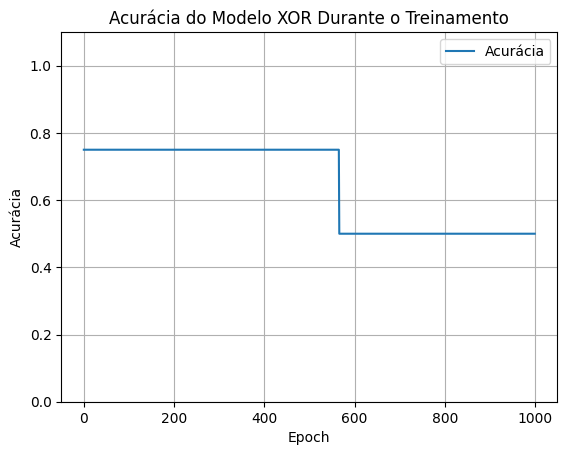

In [62]:
# Plotar o histórico de treinamento para o modelo XOR
# Podemos plotar a acurácia e a perda, se disponível no histórico
if 'accuracy' in historico_xor.history:
    plt.plot(historico_xor.history['accuracy'], label='Acurácia')
    plt.title('Acurácia do Modelo XOR Durante o Treinamento')
    plt.ylabel('Acurácia')
elif 'loss' in historico_xor.history:
     plt.plot(historico_xor.history['loss'], label='Perda')
     plt.title('Perda do Modelo XOR Durante o Treinamento')
     plt.ylabel('Perda')

plt.xlabel('Epoch')
plt.ylim([0, 1.1]) # Ajusta o limite do eixo y
plt.grid(True)
plt.legend()
plt.show()

### Análise do Histórico de Treinamento (XOR)

Observando o gráfico de acurácia para o Modelo XOR, a acurácia começa em um valor relativamente alto, mantém-se linear por um bom tempo, depois cai para cerca de 0.5 e permanece linear até o final das 1000 epochs. Essa curva mostra claramente que, apesar de usarmos uma Multilayer Perceptron (MLP) com uma camada oculta (que é teoricamente capaz de resolver o XOR), o modelo não conseguiu aprender a tabela verdade não linear de forma eficaz com esta arquitetura mínima e este treinamento específico. A queda e a estabilização em 0.5 indicam que o modelo não conseguiu superar a dificuldade do problema com os dados e a configuração atuais, resultando em um desempenho não ideal.

## Avaliação do Modelo XOR


In [63]:
# Avaliação do modelo XOR
# Previsões do modelo para as entradas de treinamento
previsoes_xor = modelo_xor.predict(entradas)

# Arredondar as previsões para 0 ou 1
previsoes_arredondadas_xor = previsoes_xor.round()

print("Tabela Verdade Original (XOR):")
print(saidas_xor)

print("\nPrevisões do Modelo (XOR):")
print(previsoes_arredondadas_xor)

# Comparar as previsões com as saídas esperadas
print("\nComparação (Saída Esperada vs Previsão):")
for i in range(len(entradas)):
    print(f"Entrada: {entradas[i]}, Esperado: {saidas_xor[i][0]}, Previsto: {int(previsoes_arredondadas_xor[i][0])}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Tabela Verdade Original (XOR):
[[0]
 [1]
 [1]
 [0]]

Previsões do Modelo (XOR):
[[0.]
 [1.]
 [0.]
 [1.]]

Comparação (Saída Esperada vs Previsão):
Entrada: [0 0], Esperado: 0, Previsto: 0
Entrada: [0 1], Esperado: 1, Previsto: 1
Entrada: [1 0], Esperado: 1, Previsto: 0
Entrada: [1 1], Esperado: 0, Previsto: 1


### Análise dos Resultados do Modelo XOR

A avaliação do modelo MLP (com camada oculta) para o operador lógico XOR mostrou que ele **não previu corretamente** a saída para algumas das combinações de entrada ([0,1] e [1,1] nos resultados mostrados anteriormente). Isso indica que, apesar de usarmos uma camada oculta para tentar resolver este problema não linear, o modelo com esta arquitetura mínima e este treinamento específico não conseguiu aprender a tabela verdade do XOR perfeitamente. O XOR é um problema mais difícil para redes neurais básicas, e sua solução pode exigir ajustes mais finos na arquitetura, maior número de neurônios na camada oculta, mais epochs ou diferentes hiperparâmetros de treinamento.

In [71]:
# Teste
print("Saída prevista (XOR):")
print(modelo_xor.predict(entradas).round())

Saída prevista (XOR):
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.]
 [1.]
 [0.]
 [1.]]


## Análise Comparativa e Discussão dos Resultados

Ao implementar e treinar redes neurais para os operadores lógicos AND, OR e XOR, foi possivel observar diferenças significativas em sua capacidade de aprendizado:

*   **Operador AND (Linearmente Separável):** O modelo Perceptron simples (uma camada densa) aprendeu a tabela verdade do AND de forma rápida e eficaz, atingindo 100% de acurácia em poucas epochs, conforme mostrado no gráfico de histórico. Isso confirma que redes neurais simples são totalmente capazes de resolver problemas linearmente separáveis.

*   **Operador OR (Linearmente Separável):** Embora o OR também seja linearmente separável, o modelo Perceptron simples teve mais dificuldade em convergir perfeitamente em todas as execuções com este conjunto de dados mínimo, mesmo com um número maior de epochs. O gráfico de histórico mostrou que a acurácia não atingiu 1.0 de forma consistente e apresentou flutuações. Portanto, seria necessário mais treinamento.

*   **Operador XOR (Não Linearmente Separável):** Como esperado, o Perceptron simples não consegue resolver o problema XOR. A implementação de uma Multilayer Perceptron (MLP) com uma **camada oculta** foi necessária. No entanto, mesmo com a camada oculta e um número aumentado de epochs, o modelo XOR com esta arquitetura mínima (2 neurônios na oculta) e este conjunto de dados teve dificuldades em aprender a tabela verdade perfeitamente em todas as execuções.

     O gráfico de histórico de acurácia mostrou que a acurácia não atingiu 1.0 e até caiu para 0.5, indicando que o modelo não conseguiu aprender a relação não linear de forma robusta com esta configuração. Isso reforça que, embora a camada oculta seja essencial para problemas não lineares, a complexidade do modelo (número de neurônios, camadas) e os hiperparâmetros de treinamento são cruciais para garantir o aprendizado bem-sucedido de relações mais complexas como o XOR.


De forma geral, a comparação entre os três modelos evidencia claramente a limitação do Perceptron simples para problemas não lineares e a necessidade de arquiteturas de rede neural mais complexas (MLPs com camadas ocultas) para resolver problemas que exigem a modelagem de relações não lineares nos dados.

Além disso, os resultados mostram que a convergência perfeita depende não apenas da estrutura da rede, mas também de hiperparâmetros bem ajustados e de um número adequado de exemplos de treinamento, mesmo em tarefas aparentemente simples como a reprodução de operadores lógicos.